# Petroleum Portfolio


https://en.wikipedia.org/wiki/Petroleum

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'USO', 'XOM','TTE','PTR','CVS', 'COP', 'BP', 'EOG', 'OXY']
start = '2021-01-20'
end = '2022-03-25'

title = 'Petroleum Trucks'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  10 of 10 completed


,BP,COP,CVS,EOG,OXY,PTR,SPY,TTE,USO,XOM
Date,,,,,,,,,,
2021-01-20,23.371038,43.526012,72.999054,56.597916,22.932945,31.745531,377.666870,41.821842,35.790001,46.149166
2021-01-21,22.626860,41.443741,72.344757,51.737259,21.458540,31.569166,378.011169,40.833122,35.759998,44.826099
2021-01-22,22.485559,40.963963,72.383812,51.577438,21.408730,30.362463,376.673248,41.064133,35.230000,44.192516
2021-01-25,21.731955,40.858410,71.495125,51.897095,21.428656,29.629162,378.158752,40.121613,35.590000,43.698692
2021-01-26,21.694279,39.994797,72.491241,50.289413,20.302925,28.951553,377.568481,40.250984,35.450001,42.738995


In [3]:
df.tail()

,BP,COP,CVS,EOG,OXY,PTR,SPY,TTE,USO,XOM
Date,,,,,,,,,,
2022-03-18,28.740000,99.303246,107.300003,115.800003,56.240002,49.410000,444.519989,49.82,74.639999,78.669998
2022-03-21,29.799999,102.453835,107.389999,122.459999,60.959999,49.730000,444.390015,50.32,79.540001,82.199997
2022-03-22,29.670000,101.466774,107.230003,120.830002,59.639999,50.240002,449.589996,50.77,78.559998,81.839996
2022-03-23,30.760000,104.059036,106.199997,123.550003,59.840000,51.639999,443.799988,51.02,81.949997,83.129997
2022-03-24,30.740000,104.228531,108.050003,121.010002,57.750000,50.490002,450.489990,51.59,79.750000,83.379997


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
num_stocks = len(symbols) - 1 #Remove SPY
n = round(1.0 / float(num_stocks), 4)
weights = [n] * num_stocks
weights = np.array(weights)
weights

array([0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111,
       0.1111])

In [8]:
Cash = 100000
print('Percentage of invest:')
percent_invest = weights
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
BP: 11110.0
COP: 11110.0
CVS: 11110.0
EOG: 11110.0
OXY: 11110.0
PTR: 11110.0
SPY: 11110.0
TTE: 11110.0
USO: 11110.0


In [9]:
print('Number of Shares:')
percent_invest = weights
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
BP: 475
COP: 255
CVS: 152
EOG: 196
OXY: 484
PTR: 349
SPY: 29
TTE: 265
USO: 310


In [10]:
print('Beginning Value:')
percent_invest = weights
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
BP: $11101.24
COP: $11099.13
CVS: $11095.86
EOG: $11093.19
OXY: $11099.55
PTR: $11079.19
SPY: $10952.34
TTE: $11082.79
USO: $11094.9


In [11]:
print('Current Value:')
percent_invest = weights
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
BP: $14601.5
COP: $26578.28
CVS: $16423.6
EOG: $23717.96
OXY: $27951.0
PTR: $17621.01
SPY: $13064.21
TTE: $13671.35
USO: $24722.5


In [12]:
result = []
percent_invest = weights
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $178351.41


In [13]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: BP: 31.53%
Holding Period Return: COP: 139.46%
Holding Period Return: CVS: 48.02%
Holding Period Return: EOG: 113.80999999999999%
Holding Period Return: OXY: 151.82%
Holding Period Return: PTR: 59.050000000000004%
Holding Period Return: SPY: 19.28%
Holding Period Return: TTE: 23.36%
Holding Period Return: USO: 122.83%
Holding Period Return: XOM: 80.67%


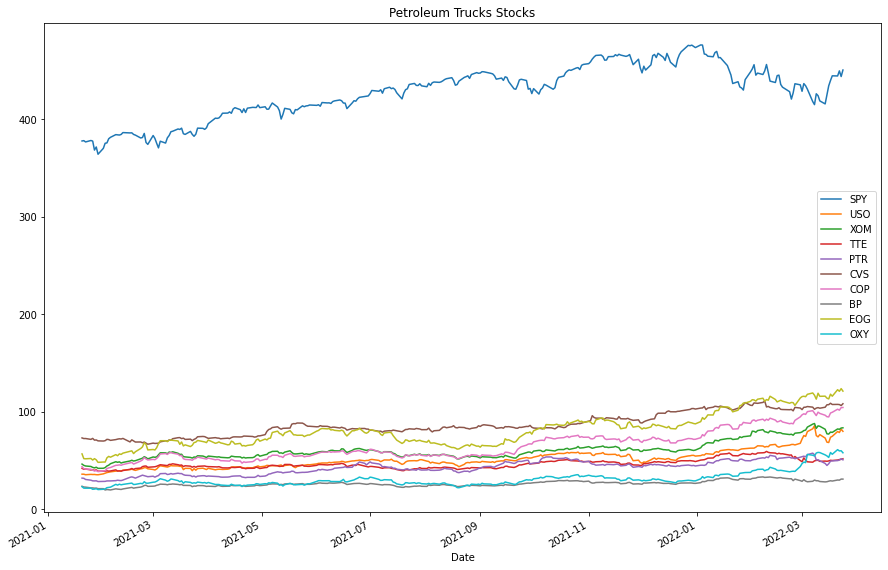

In [14]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title(title + ' Stocks')
plt.legend()

In [15]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

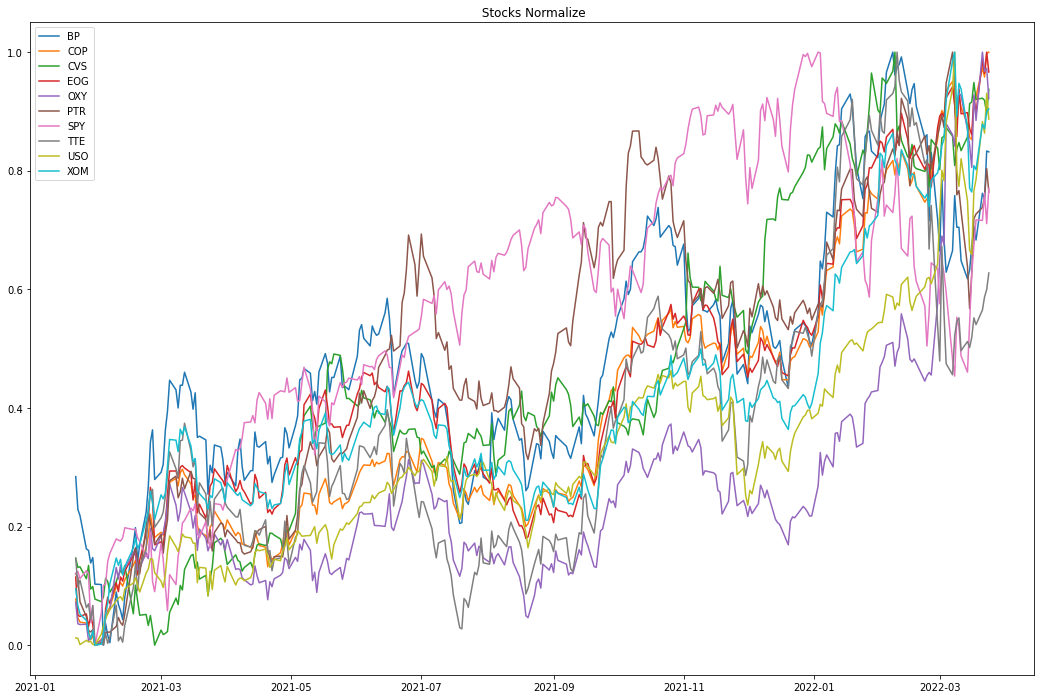

In [16]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [17]:
df.min()

BP      19.546515
COP     38.411510
CVS     66.534126
EOG     47.910793
OXY     19.984137
PTR     28.236814
SPY    364.070862
TTE     38.837204
USO     35.180000
XOM     41.779305
dtype: float64

In [18]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
USO: 85.43000030517578
XOM: 87.77999877929688
TTE: 59.15696716308594
PTR: 57.36000061035156
CVS: 110.83000183105469
COP: 104.22853088378906
BP: 33.003726959228516
EOG: 123.55000305175781
OXY: 60.959999084472656


In [19]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,USO Return,XOM Return,TTE Return,PTR Return,CVS Return,COP Return,BP Return,EOG Return,OXY Return
Date,,,,,,,,,,
2021-01-21,0.000912,-0.000838,-0.028669,-0.023641,-0.005556,-0.008963,-0.047840,-0.031842,-0.085880,-0.064292
2021-01-22,-0.003539,-0.014821,-0.014134,0.005657,-0.038224,0.000540,-0.011577,-0.006245,-0.003089,-0.002321
2021-01-25,0.003944,0.010219,-0.011174,-0.022952,-0.024152,-0.012277,-0.002577,-0.033515,0.006198,0.000931
2021-01-26,-0.001561,-0.003934,-0.021962,0.003224,-0.022870,0.013933,-0.021137,-0.001734,-0.030978,-0.052534


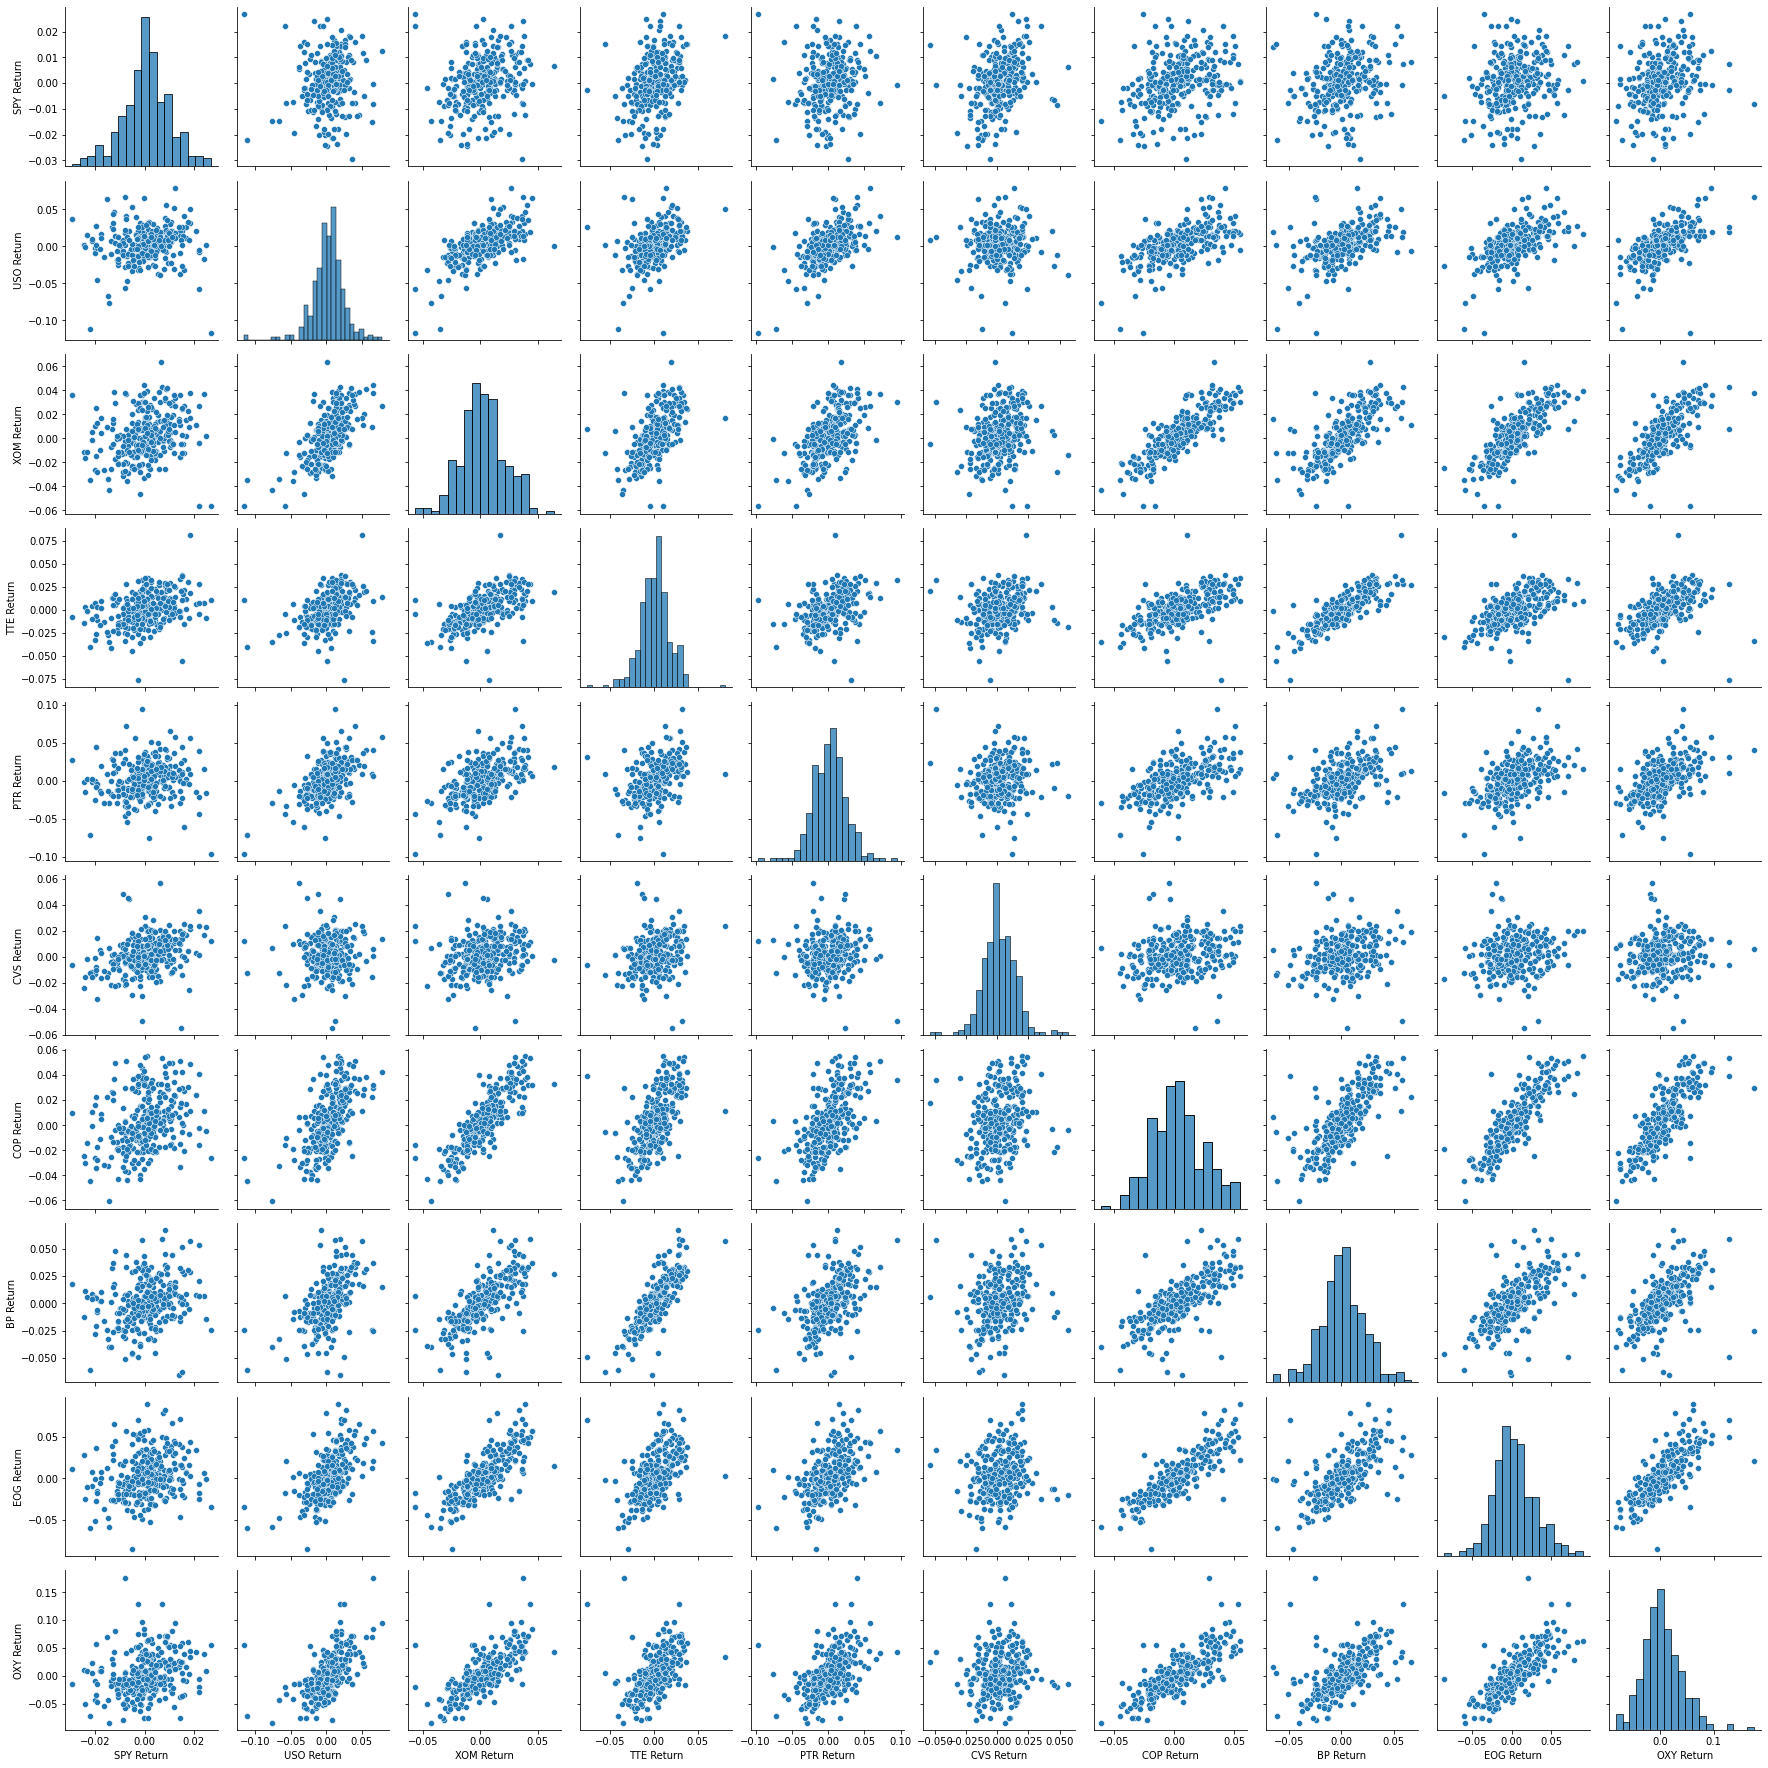

In [20]:
sns.pairplot(returns[1:] )

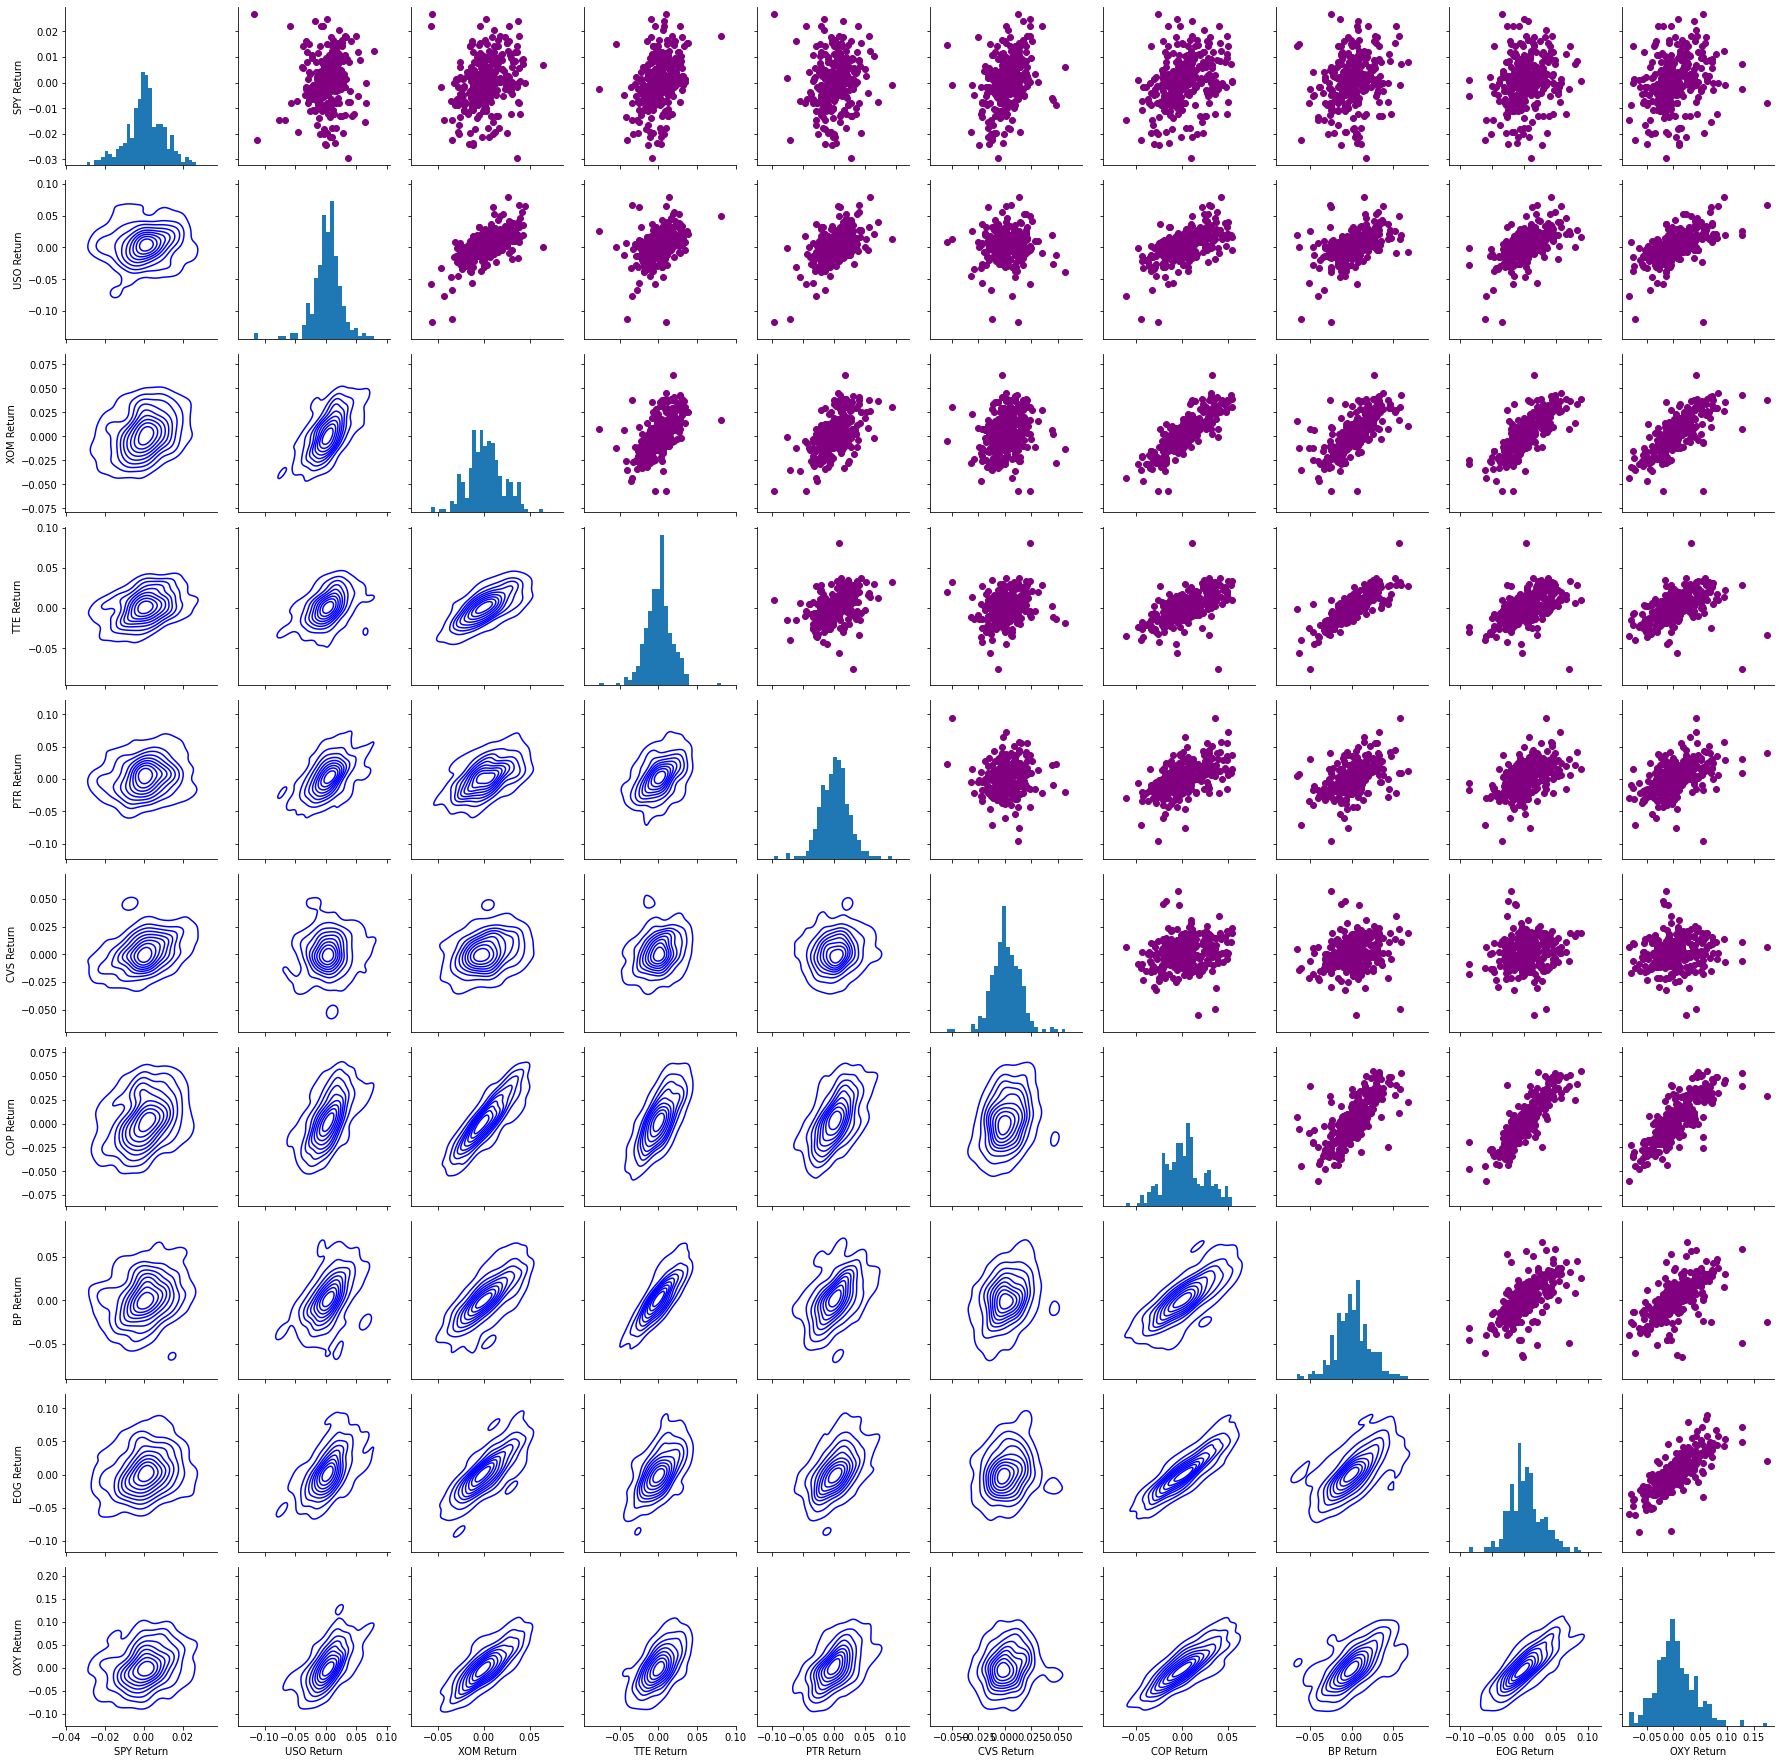

In [21]:
nplot = len(returns.columns)

ax = sns.PairGrid(returns)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

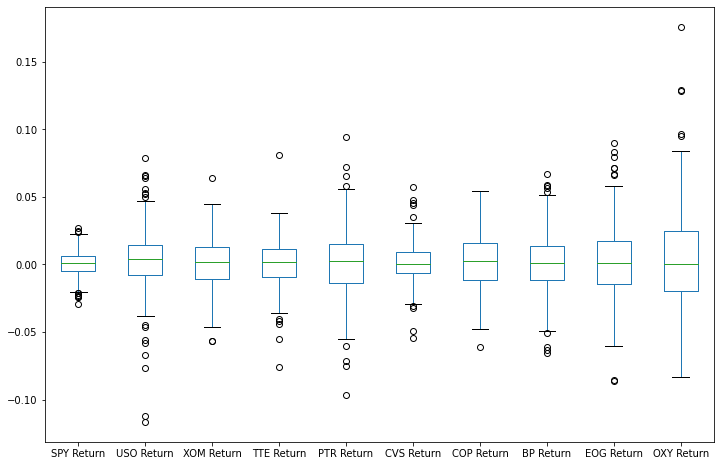

In [22]:
returns.plot(kind='box',figsize=(12,8))

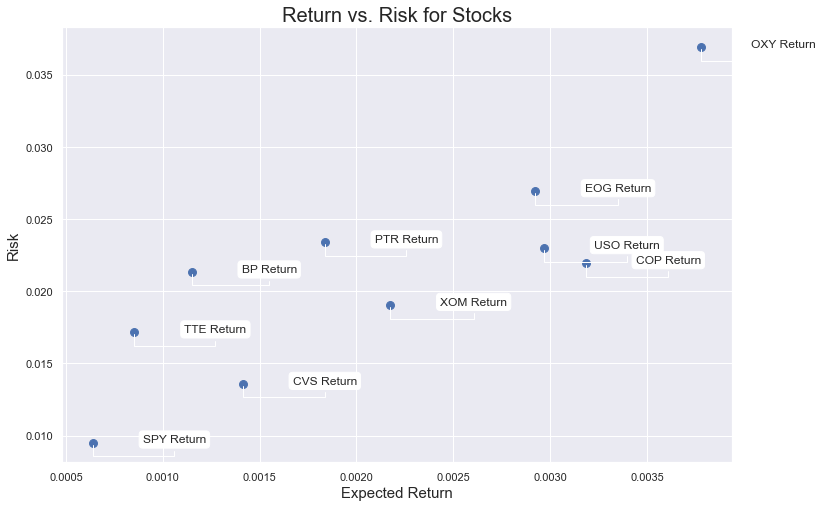

In [23]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [24]:
table = pd.DataFrame()
table['Average Returns'] = returns.mean()
table['Minimum Returns'] = returns.min()
table['Maximum Returns'] = returns.max()
table['Median Returns'] = returns.median()
table['Risk'] = returns.std()
table.sort_values(by='Average Returns')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,0.000639,-0.029479,0.026811,0.000900,0.009514
TTE Return,0.000854,-0.076234,0.080949,0.001566,0.017141
BP Return,0.001149,-0.065736,0.066861,0.000866,0.021293
CVS Return,0.001413,-0.054498,0.056939,0.000607,0.013574
PTR Return,0.001836,-0.096537,0.094481,0.002754,0.023375
XOM Return,0.002174,-0.056913,0.064113,0.001806,0.019047
EOG Return,0.002921,-0.085880,0.090129,0.000759,0.026923
USO Return,0.002968,-0.116587,0.079086,0.004043,0.022979
COP Return,0.003183,-0.060707,0.054674,0.002699,0.021935
OXY Return,0.003781,-0.083333,0.175916,0.000686,0.036894


In [25]:
table.sort_values(by='Risk')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,0.000639,-0.029479,0.026811,0.000900,0.009514
CVS Return,0.001413,-0.054498,0.056939,0.000607,0.013574
TTE Return,0.000854,-0.076234,0.080949,0.001566,0.017141
XOM Return,0.002174,-0.056913,0.064113,0.001806,0.019047
BP Return,0.001149,-0.065736,0.066861,0.000866,0.021293
COP Return,0.003183,-0.060707,0.054674,0.002699,0.021935
USO Return,0.002968,-0.116587,0.079086,0.004043,0.022979
PTR Return,0.001836,-0.096537,0.094481,0.002754,0.023375
EOG Return,0.002921,-0.085880,0.090129,0.000759,0.026923
OXY Return,0.003781,-0.083333,0.175916,0.000686,0.036894


In [26]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return   2022-03-09
USO Return   2022-03-17
XOM Return   2022-02-01
TTE Return   2022-03-02
PTR Return   2021-02-16
CVS Return   2021-11-03
COP Return   2021-02-03
BP Return    2021-08-03
EOG Return   2021-02-03
OXY Return   2022-03-04
dtype: datetime64[ns]


In [27]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return   2022-03-07
USO Return   2022-03-09
XOM Return   2022-03-15
TTE Return   2022-02-28
PTR Return   2022-03-09
CVS Return   2022-02-09
COP Return   2021-03-18
BP Return    2021-02-02
EOG Return   2021-01-21
OXY Return   2021-03-18
dtype: datetime64[ns]


In [28]:
returns.corr()

,SPY Return,USO Return,XOM Return,TTE Return,PTR Return,CVS Return,COP Return,BP Return,EOG Return,OXY Return
SPY Return,1.000000,0.094294,0.228853,0.344274,0.092112,0.313217,0.295446,0.227342,0.196158,0.234934
USO Return,0.094294,1.000000,0.643711,0.400381,0.562054,0.037164,0.595660,0.506741,0.569119,0.586432
XOM Return,0.228853,0.643711,1.000000,0.592870,0.556898,0.195727,0.851755,0.700486,0.770790,0.741644
TTE Return,0.344274,0.400381,0.592870,1.000000,0.387636,0.222880,0.595416,0.815801,0.505535,0.445404
PTR Return,0.092112,0.562054,0.556898,0.387636,1.000000,0.054754,0.564730,0.489189,0.500331,0.489183
CVS Return,0.313217,0.037164,0.195727,0.222880,0.054754,1.000000,0.196090,0.217272,0.149116,0.114934
COP Return,0.295446,0.595660,0.851755,0.595416,0.564730,0.196090,1.000000,0.722949,0.853225,0.797286
BP Return,0.227342,0.506741,0.700486,0.815801,0.489189,0.217272,0.722949,1.000000,0.634983,0.563255
EOG Return,0.196158,0.569119,0.770790,0.505535,0.500331,0.149116,0.853225,0.634983,1.000000,0.770094
OXY Return,0.234934,0.586432,0.741644,0.445404,0.489183,0.114934,0.797286,0.563255,0.770094,1.000000


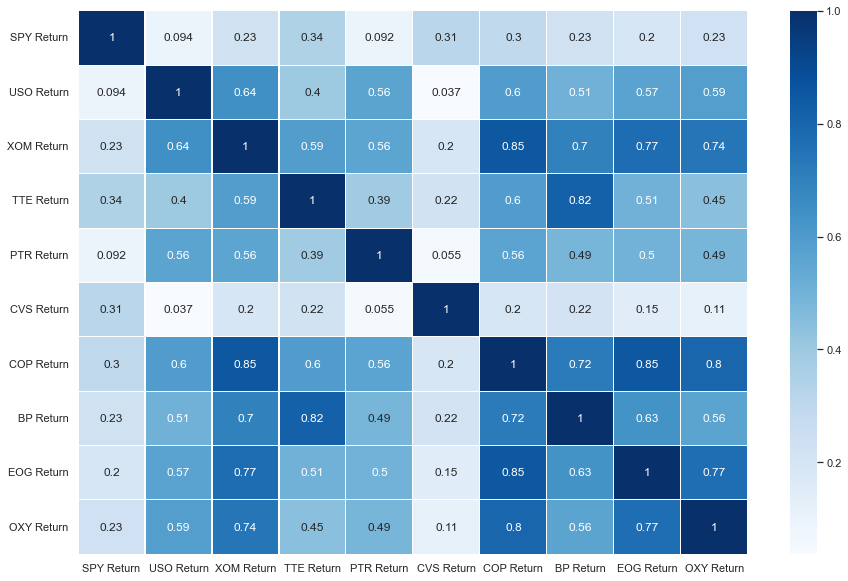

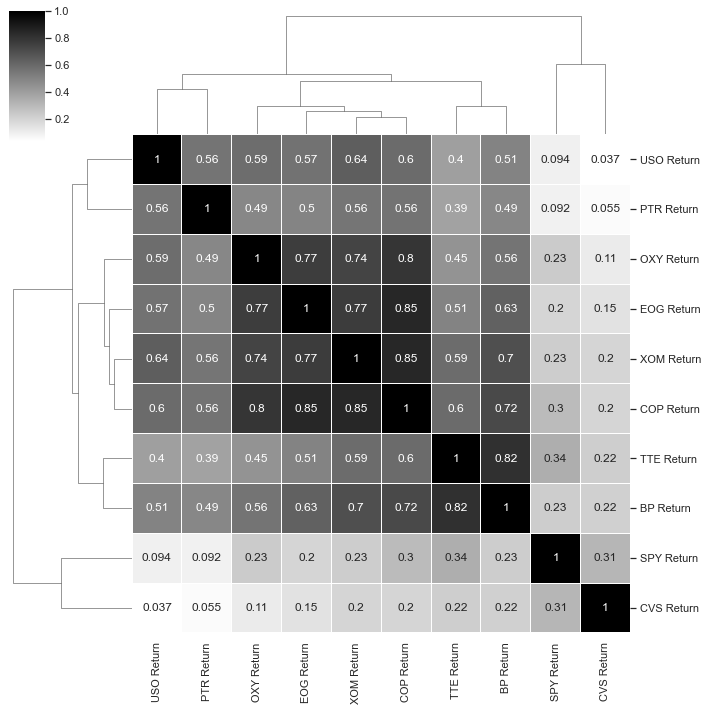

In [29]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

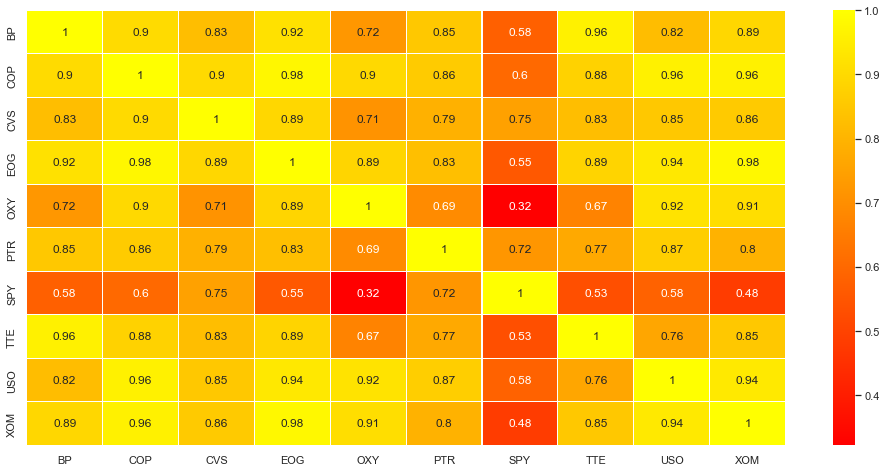

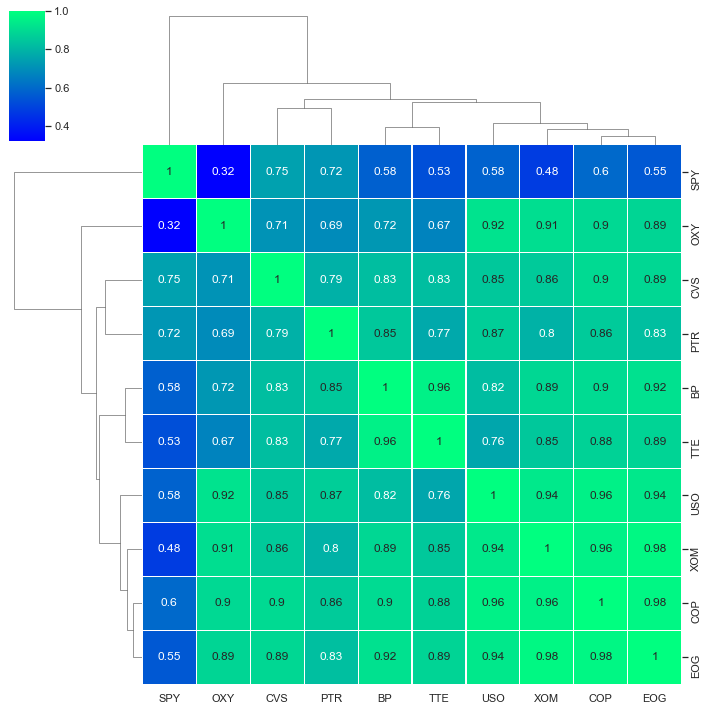

In [30]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [31]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [32]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [33]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02609277 -0.02487979 -0.0159537  -0.03152365 -0.04342082 -0.02806923
                     -0.01153275 -0.02107592 -0.02643126 -0.02219403]
95%                 [-0.03381544 -0.03283525 -0.02087688 -0.04128821 -0.05680189 -0.03654696
                     -0.01498327 -0.02729263 -0.03476545 -0.02910204]
99%                 [-0.04830189 -0.04775837 -0.03011195 -0.0596049  -0.08190255 -0.05244976
                     -0.02145588 -0.03895415 -0.05039901 -0.0420603 ]


In [34]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
BP: -0.0261
COP: -0.0249
CVS: -0.016
EOG: -0.0315
OXY: -0.0434
PTR: -0.0281
SPY: -0.0115
TTE: -0.0211
USO: -0.0264
XOM: -0.0222


In [35]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
BP: $2610.0
COP: $2490.0
CVS: $1600.0
EOG: $3150.0
OXY: $4340.0
PTR: $2810.0
SPY: $1150.0
TTE: $2110.0
USO: $2640.0
XOM: $2220.0


In [36]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
BP: $4830.0
COP: $4780.0
CVS: $3010.0
EOG: $5960.0
OXY: $8190.0
PTR: $5240.0
SPY: $2150.0
TTE: $3900.0
USO: $5040.0
XOM: $4210.0


In [37]:
returns.loc[:,returns.columns!='SPY']

,BP,COP,CVS,EOG,OXY,PTR,TTE,USO,XOM
Date,,,,,,,,,
2021-01-21,-0.031842,-0.047840,-0.008963,-0.085880,-0.064292,-0.005556,-0.023641,-0.000838,-0.028669
2021-01-22,-0.006245,-0.011577,0.000540,-0.003089,-0.002321,-0.038224,0.005657,-0.014821,-0.014134
2021-01-25,-0.033515,-0.002577,-0.012277,0.006198,0.000931,-0.024152,-0.022952,0.010219,-0.011174
2021-01-26,-0.001734,-0.021137,0.013933,-0.030978,-0.052534,-0.022870,0.003224,-0.003934,-0.021962
2021-01-27,-0.013026,-0.024712,-0.024384,0.028416,0.009814,-0.002244,-0.013774,0.001410,-0.011336
...,...,...,...,...,...,...,...,...,...
2022-03-18,-0.010331,0.007791,-0.011606,-0.017562,-0.030512,0.004677,-0.004622,0.013029,-0.003925
2022-03-21,0.036882,0.031727,0.000839,0.057513,0.083926,0.006476,0.010036,0.065648,0.044871
2022-03-22,-0.004362,-0.009634,-0.001490,-0.013310,-0.021654,0.010255,0.008943,-0.012321,-0.004380


In [38]:
annual_returns = returns.mean() * 252
annual_returns

BP     0.289556
COP    0.802159
CVS    0.356043
EOG    0.736073
OXY    0.952820
PTR    0.462680
SPY    0.161027
TTE    0.215105
USO    0.747856
XOM    0.547854
dtype: float64

In [39]:
# Show shotcks that have higher returns than S&P500
for i in range(0, len(annual_returns)):
  if annual_returns[i] > annual_returns['SPY']:
    print(annual_returns.index[i], ':', round(annual_returns[i], 4))

BP : 0.2896
COP : 0.8022
CVS : 0.356
EOG : 0.7361
OXY : 0.9528
PTR : 0.4627
TTE : 0.2151
USO : 0.7479
XOM : 0.5479


In [40]:
sorted_annual_returns = annual_returns.sort_values(ascending=False)
sorted_annual_returns

OXY    0.952820
COP    0.802159
USO    0.747856
EOG    0.736073
XOM    0.547854
PTR    0.462680
CVS    0.356043
BP     0.289556
TTE    0.215105
SPY    0.161027
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

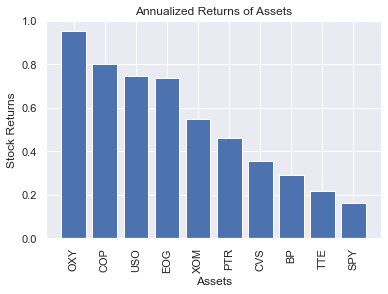

In [41]:
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel('Stock Returns')
plt.xlabel('Assets')
plt.title('Annualized Returns of Assets')
plt.xticks(rotation = 90)